# Python - Visualization

The most widely used data visualization library is ```matplotlib```. It was originally created by John Hunter, a neurobiologist, to visualize ECoGs. Much like MATLAB, ```matplotlib``` makes it very easy for non-programmers to quickly and easily generate graphics.

The architecture of ```matplotlib``` is composed of three layers:

**The back-end layer** is comprised of three built-in low level classes: FigureCanvas, Renderer and Event.

**The artist layer** contains one main object: Artist. All visual elements are an Artist instance (either primitive or composite type). The axes are the most important instance of type composite because that is where most of the API plotting methods are defined. 

**The scripting layer** was developed for non-programmers to perform quick exploratory data analysis. Users interact with this layer via the ```matplotlib.pyplot``` interface.

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [66]:
df = pd.read_excel("assets/canada.xlsx", sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


#### Data Cleaning & Preparation

In [69]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df.columns = list(map(str, df.columns))
df.set_index('Country', inplace=True)
df['Total'] = df.sum(axis=1)
years = list(map(str, range(1980, 2014)))

In [4]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


### Plotting with Pandas

#### Line

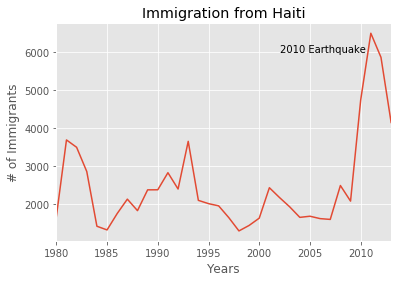

In [5]:
haiti_df = df.loc["Haiti", years]
haiti_df.index = haiti_df.index.map(int)

haiti_df.transpose().plot(kind="line")

plt.title("Immigration from Haiti")
plt.xlabel("Years")
plt.ylabel("# of Immigrants")
plt.text(2002, 6000, "2010 Earthquake")

plt.show()

#### Area

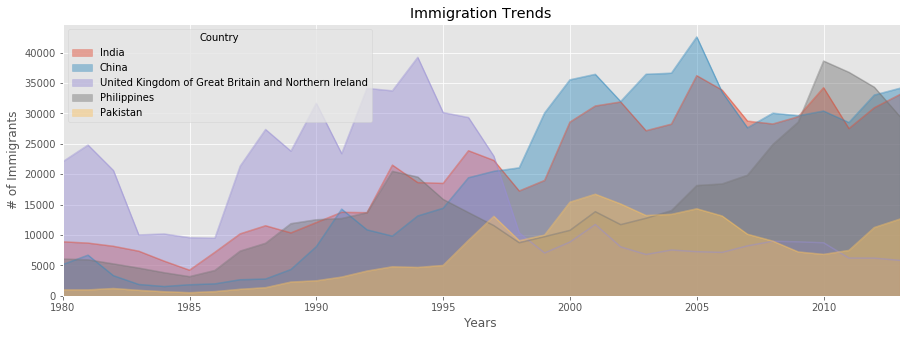

In [6]:
top_5_df = df.sort_values("Total", ascending=False).head()
top_5_df = top_5_df[years].transpose()

top_5_df.plot(kind="area", alpha=0.45, stacked=False, figsize=(15, 5)) # Defaults to stacked=True

plt.title("Immigration Trends")
plt.xlabel("Years")
plt.ylabel("# of Immigrants")

plt.show()

#### Histograms

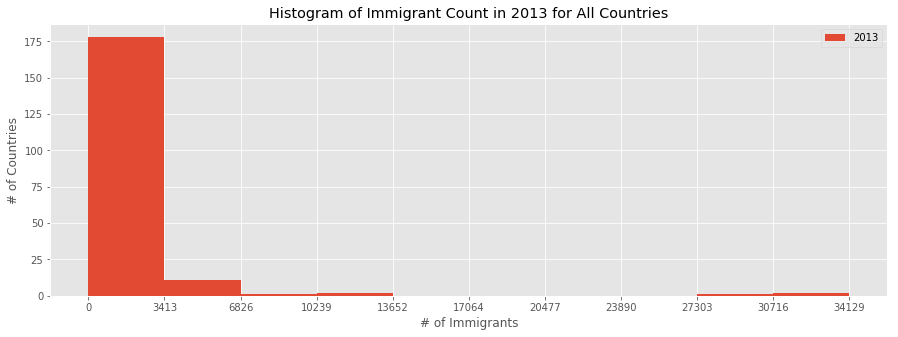

In [19]:
data_2013 = df[["2013"]]

count, bin_edges = np.histogram(data_2013)

data_2013.plot(kind="hist", xticks=bin_edges, figsize=(15,5))

plt.title("Histogram of Immigrant Count in 2013 for All Countries")
plt.xlabel("# of Immigrants")
plt.ylabel("# of Countries")

plt.show()

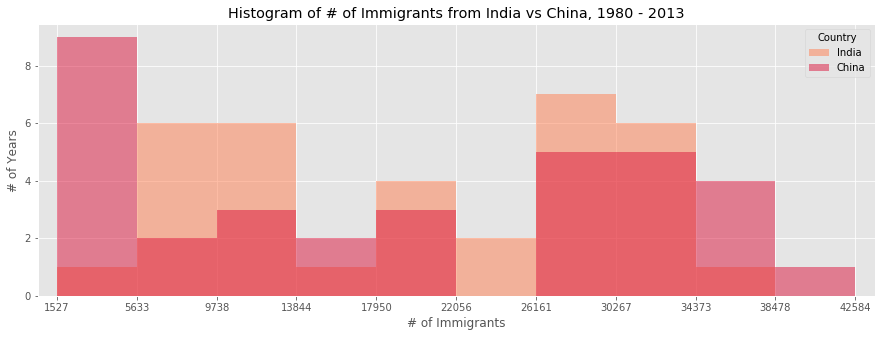

In [77]:
df_india_china = df.loc[["India", "China"]][years].transpose()

count, bin_edges = np.histogram(df_india_china)

x_min = bin_edges[0] - 1000
x_max = bin_edges[-1] + 1000

df_india_china.plot(kind="hist", figsize=(15,5), xticks=bin_edges, stacked=False, alpha=0.5,
                    color=["coral", "crimson"], xlim=(x_min,x_max))

plt.title("Histogram of # of Immigrants from India vs China, 1980 - 2013")
plt.xlabel("# of Immigrants")
plt.ylabel("# of Years")

plt.show()

#### Bar

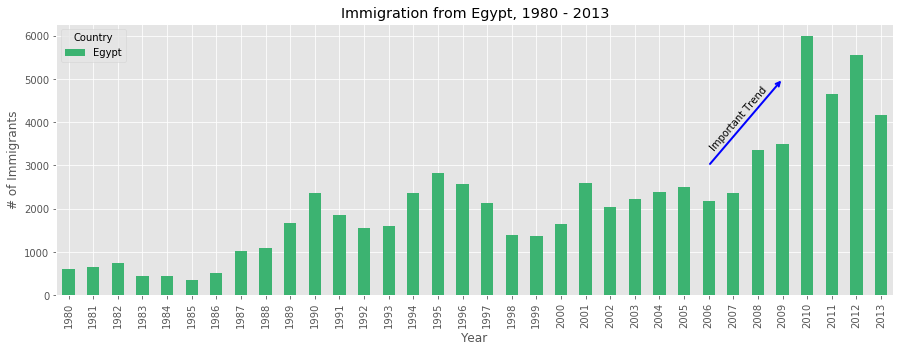

In [130]:
df_egypt = df.loc[["Egypt"]][years].transpose()

df_egypt.plot(kind="bar", figsize=(15,5), color=["mediumseagreen"])

plt.title("Immigration from Egypt, 1980 - 2013")
plt.xlabel("Year")
plt.ylabel("# of Immigrants")

# Annotate arrow
plt.annotate('',                        # s: str. will leave it blank for no text
             xy=(29, 5000),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(26, 3000),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',           # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('Important Trend',              # text to display
             xy=(26, 3300),                  # start the text at at point (year 2008 , pop 30)
             rotation=49.2,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

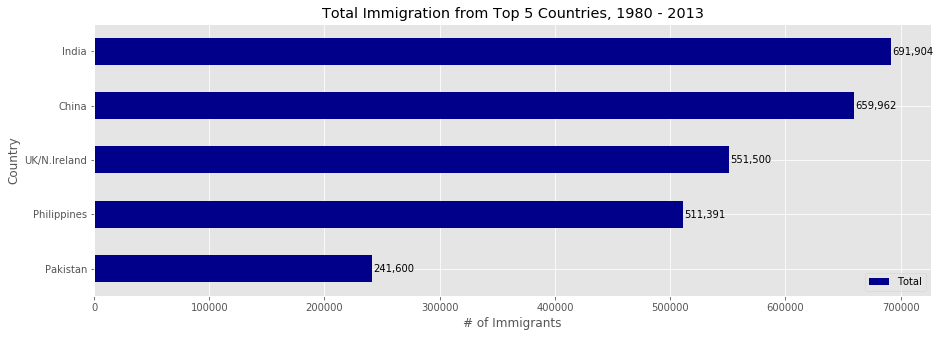

In [109]:
top_5 = df.sort_values("Total", ascending=False).head(5)
top_5 = top_5[["Total"]]

top_5.rename(index={"United Kingdom of Great Britain and Northern Ireland":"UK/N.Ireland"}, inplace=True)

ax = top_5.plot(kind="barh", figsize=(15,5), color=["darkblue"])

plt.title("Total Immigration from Top 5 Countries, 1980 - 2013")
plt.xlabel("# of Immigrants")
plt.ylabel("Country")
ax.invert_yaxis()

for i, v in enumerate(top_5["Total"]):
    label = "{:,}".format(v)
    plt.annotate(label, xy=(v + 500, i + 0.06), color='black')

plt.show()

#### All Available Matplotlib Colors

In [35]:
for name, hex in mpl.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F
